<a href="https://colab.research.google.com/github/mcfardc/AERO-7970/blob/main/HW4_P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 4 Problem 2
This code solves for the deflegration velocity (flame speed) of 2 reactions of methane-air and methane-oxygen-argon at various values of equivalence ratios

In [1]:
!pip install Cantera
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 69.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.7/117.7 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 739.1/739.1 kB 35.2 MB/s eta 0:00:00


Methane-air reaction

Flame speed is 1.23 cm/s
Flame speed is 4.95 cm/s
Flame speed is 11.62 cm/s
Flame speed is 19.66 cm/s
Flame speed is 27.67 cm/s
Flame speed is 34.27 cm/s
Flame speed is 38.24 cm/s
Flame speed is 38.56 cm/s
Flame speed is 33.90 cm/s
Flame speed is 24.06 cm/s
Flame speed is 14.13 cm/s
Flame speed is 10.29 cm/s
Flame speed is 8.21 cm/s
Flame speed is 6.68 cm/s
Flame speed is 5.54 cm/s
Flame speed is 4.71 cm/s
Flame speed is 4.01 cm/s
Flame speed is 3.42 cm/s
Flame speed is 2.99 cm/s
Flame speed is 2.62 cm/s
Flame speed is 2.32 cm/s
Flame speed is 2.07 cm/s
Flame speed is 1.85 cm/s
Flame speed is 1.67 cm/s
Flame speed is 1.52 cm/s
Flame speed is 1.39 cm/s
Flame speed is 1.27 cm/s


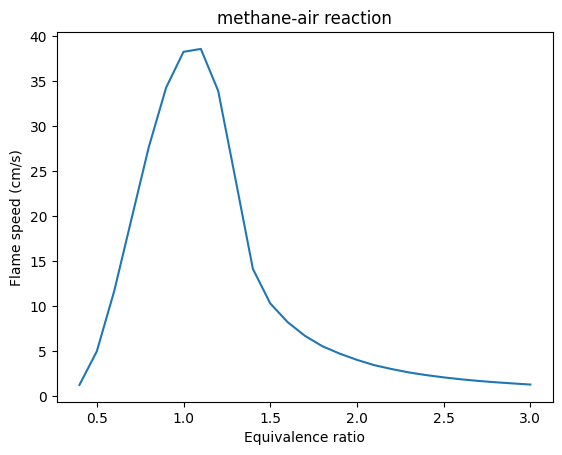

In [13]:
phi_vec = np.arange(.4,3.1,.1) # equiv ratio vector
SL_vec = np.zeros(len(phi_vec)) # flame speed vector

for i in range(len(phi_vec)):
    gas1 = ct.Solution('gri30.yaml')
    gas1.TP = 300, ct.one_atm
    phi = phi_vec[i]
    FUEL = 'CH4:1'
    OXID = 'O2:1, N2:3.76'
    gas1.set_equivalence_ratio(phi,FUEL,OXID)

    w = 0.03

    flame = ct.FreeFlame(gas1, width=w)

    flame.set_refine_criteria(ratio = 3, slope = 0.1, curve = 0.1)
    loglevel = 0

    flame.solve(loglevel = loglevel, auto=True)
    Su0 = flame.velocity[0]
    SL_vec[i] = Su0
    print('Flame speed is {:.2f} cm/s'.format(Su0*100))

plt.figure(1)
plt.plot(phi_vec,SL_vec*100)
plt.xlabel('Equivalence ratio')
plt.ylabel('Flame speed (cm/s)')
plt.title('methane-oxygen-nitrogen reaction')
plt.show()

Methane-oxygen-argon reaction

Flame speed is 8.47 cm/s
Flame speed is 20.81 cm/s
Flame speed is 35.43 cm/s
Flame speed is 49.33 cm/s
Flame speed is 61.21 cm/s
Flame speed is 69.61 cm/s
Flame speed is 74.25 cm/s
Flame speed is 74.37 cm/s
Flame speed is 70.02 cm/s
Flame speed is 60.64 cm/s
Flame speed is 47.52 cm/s
Flame speed is 34.64 cm/s
Flame speed is 25.39 cm/s
Flame speed is 19.88 cm/s
Flame speed is 15.96 cm/s
Flame speed is 12.92 cm/s
Flame speed is 10.50 cm/s
Flame speed is 8.74 cm/s
Flame speed is 7.26 cm/s
Flame speed is 6.11 cm/s
Flame speed is 5.20 cm/s
Flame speed is 4.52 cm/s
Flame speed is 3.92 cm/s
Flame speed is 3.43 cm/s
Flame speed is 3.02 cm/s
Flame speed is 2.68 cm/s
Flame speed is 2.40 cm/s


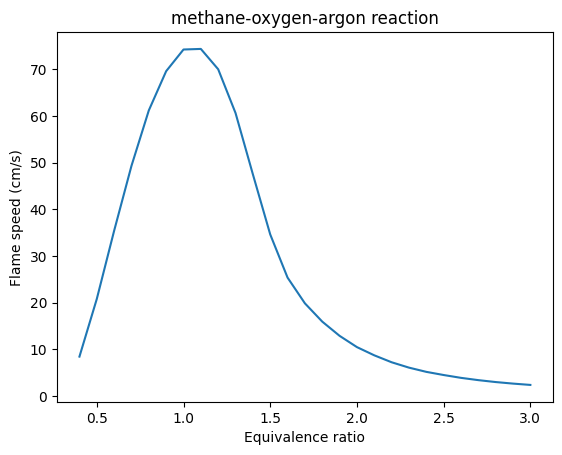

In [19]:
phi_vec2 = np.arange(.4,3.1,.1) # equiv ratio vector
SL_vec2 = np.zeros(len(phi_vec2)) # flame speed vector

for i in range(len(phi_vec)):
    gas2 = ct.Solution('gri30.yaml')
    gas2.TP = 300, ct.one_atm
    phi = phi_vec2[i]
    FUEL = 'CH4:1'
    OXID = 'O2:1, Ar:3.76'
    gas2.set_equivalence_ratio(phi,FUEL,OXID)

    w = 0.03

    flame = ct.FreeFlame(gas2, width=w)

    flame.set_refine_criteria(ratio = 3, slope = 0.1, curve = 0.1)
    loglevel = 0

    flame.solve(loglevel = loglevel, auto=True)
    Su0 = flame.velocity[0]
    SL_vec2[i] = Su0
    print('Flame speed is {:.2f} cm/s'.format(Su0*100))

plt.figure(2)
plt.plot(phi_vec2,SL_vec2*100)
plt.xlabel('Equivalence ratio')
plt.ylabel('Flame speed (cm/s)')
plt.title('methane-oxygen-argon reaction')
plt.show()